<a href="https://colab.research.google.com/github/hengyingchou/Machine-learning-Project/blob/master/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import numpy.linalg as LA

In [0]:
# Setups
%matplotlib inline
%pdb off
import numpy as np
# limit number of decimal places printed for floating-point numbers
np.set_printoptions(precision=3)

# scipy = scientific Python, implements operations on arrays / matrices
import scipy as sp
# linalg = linear algebra, implements eigenvalues, matrix inverse, etc
from scipy import linalg as la
# optimize = optimization, root finding, etc
from scipy import optimize as op

# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})
# use LaTeX to render symbols
mpl.rc('text',usetex=False)
# animation
from matplotlib import animation as animation
from IPython.display import HTML
mpl.rc('animation', html='jshtml')
# Matlab-style plotting
import matplotlib.pyplot as plt

# symbolic computation, i.e. computer algebra (like Mathematica, Wolfram Alpha)
import sympy as sym


Automatic pdb calling has been turned OFF


In [0]:
def inverted_pen_matrix(state,u = 0):
    """
      inputs:
        t: a number
        t is the time of this iteration
        state: a 1*4 vector
        state is the current state, listed as [x,x',theta,theta'] 
        u: a function 
        u is a function that yields the input force

        outputs:
        state_new: a 1*4 vector
        state_new is the new state after running this iteration , listed as [x,x',theta,theta'] 

    """

    M = 10
    m = 1
    l = 1
    g = 9.81
    
    x,dx,theta,dtheta = state[0],state[1],state[2],state[3]

    A = np.array([[M+m,-m*l*np.cos(theta)],[-np.cos(theta),l]])
    #print(A)
    B = np.array([[u - m*l*dtheta**2*np.sin(theta)],[g*np.sin(theta)]])
    #print(B)
    inv_A = np.linalg.inv(A)

    total_M = np.dot(inv_A,B)
 
    ddtheta = total_M[1]
    ddx = total_M[0]

    return np.hstack([dx, ddx, dtheta, ddtheta])

In [0]:
x0 = np.array([0,0,np.pi,0])
t_end = 10
t_step = 0.01
t_ = np.arange(0,t_end,t_step)

impulse_force = lambda t: 1 if t == 0 else 0
step_force = lambda t: 1
ramp_force = lambda t: t
sin_force = lambda t: np.sin(t)

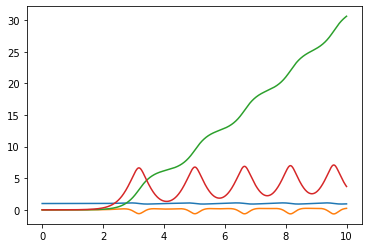

In [0]:
N = 4 
t = 10
T = np.linspace(0,10,1001)
m = len(T)
X = np.zeros([m,N])
X0 = np.array([1,0,0,0])
X[0,:] = X0
dt = T[1] - T[0]



for i in range(m-1):
    D = inverted_pen_matrix(X[i,:],impulse_force(T[i]))
    #print(D)
    X[i+1,:] = X[i,:] + D*dt
np.savetxt('impulse.txt', X, fmt='%.2e')

    
#print(X)
plt.plot(T,X)



In [0]:
def inverted_pen(state,u = 0):
    """
        inputs:
        t: a number
        t is the time of this iteration
        state: a 1*4 vector
        state is the current state, listed as [x,x',theta,theta'] 
        u: a function 
        u is a function that yields the input force

        outputs:
            state_new: a 1*4 vector
            state_new is the new state after running this iteration , listed as [x,x',theta,theta'] 

    """

    M = 10
    m = 1
    l = 1
    g = 9.81

    x,dx,theta,dtheta = state[0],state[1],state[2],state[3]

    #ddtheta = ((u/(M+m))-(m*l*dtheta**2*np.cos(theta))/(M+m) + (g*np.sin(theta))/np.cos(theta)) / (l/np.cos(theta) - (m*l*np.cos(theta))/(M*m))
    #ddx = (l*ddtheta) / np.cos(theta) - (g*np.sin(theta))/(np.cos(theta))
    ddx = (u+m*np.sin(theta)*(l*dtheta**2-g*np.cos(theta)))/(M+m*(np.sin(theta))**2)
    ddtheta = (u*np.cos(theta) - m*l*dtheta**2*np.sin(theta)*np.cos(theta) + (M+m)*g*np.sin(theta))/l/(M+m*(np.sin(theta))**2)

    return np.hstack([dx, ddx, dtheta, ddtheta])

[[ 1.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 1.000e+00  1.000e-03  0.000e+00  1.000e-03]
 [ 1.000e+00  1.000e-03  1.000e-05  1.000e-03]
 ...
 [ 1.080e+00 -2.222e-01  3.056e+01  3.833e+00]
 [ 1.078e+00 -2.281e-01  3.060e+01  3.762e+00]
 [ 1.076e+00 -2.333e-01  3.064e+01  3.694e+00]]


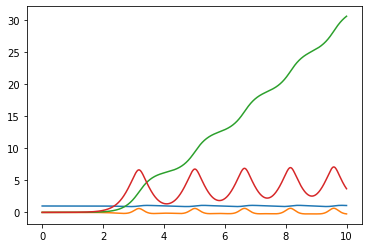

In [0]:
N = 4 
t = 10
T = np.linspace(0,10,1001)
m = len(T)
X = np.zeros([m,N])
X0 = np.array([1,0,0,0])
X[0,:] = X0
dt = T[1] - T[0]
for i in range(m-1):
    D = inverted_pen(X[i,:],impulse_force(T[i]))
    #print(D)
    X[i+1,:] = X[i,:] + D*dt
print(X)    
plt.plot(T,X)

In [0]:
X = np.zeros([m,N])
X0 = np.array([1,0,0,0])
X[0,:] = X0
for i in range(m-1):
    D = inverted_pen_matrix(X[i,:],step_force(T[i]))
    X[i+1,:] = X[i,:] + D*dt
np.savetxt('step_force.txt', X, fmt='%.2e')

In [0]:
X = np.zeros([m,N])
X0 = np.array([1,0,0,0])
X[0,:] = X0
for i in range(m-1):
    D = inverted_pen_matrix(X[i,:],ramp_force(T[i]))
    X[i+1,:] = X[i,:] + D*dt
np.savetxt('ramp_force.txt', X, fmt='%.2e')

In [0]:
X = np.zeros([m,N])
X0 = np.array([1,0,0,0])
X[0,:] = X0
for i in range(m-1):
    D = inverted_pen_matrix(X[i,:],sin_force(T[i]))
    #print(D)
    X[i+1,:] = X[i,:] + D*dt
np.savetxt('sin_force.txt', X, fmt='%.2e')